In [1]:
## Implement an Apriori algorithm using tool like python with libraries such as Pandas and Mlxtend 

In [2]:
#!pip install mlxtend

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mlxtend.frequent_patterns import association_rules,apriori
from mlxtend.preprocessing import TransactionEncoder
import warnings
warnings.filterwarnings('ignore')

In [4]:
# Load your dataset
df = pd.read_excel('Online retail.xlsx')
df.head()

,"shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil"
0,"burgers,meatballs,eggs"
1,chutney
2,"turkey,avocado"
3,"mineral water,milk,energy bar,whole wheat rice..."
4,low fat yogurt


In [5]:
df.shape

(7500, 1)

In [6]:
df.isnull().sum()

shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil    0
dtype: int64

## Preparing a new dataset

In [7]:
# Split the transaction items and create a one-hot encoding (binary matrix)
transactions = df[df.columns[0]].dropna().apply(lambda x: x.split(','))
transactions

0                              [burgers, meatballs, eggs]
1                                               [chutney]
2                                       [turkey, avocado]
3       [mineral water, milk, energy bar, whole wheat ...
4                                        [low fat yogurt]
                              ...                        
7495                    [butter, light mayo, fresh bread]
7496    [burgers, frozen vegetables, eggs, french frie...
7497                                            [chicken]
7498                                [escalope, green tea]
7499    [eggs, frozen smoothie, yogurt cake, low fat y...
Name: shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil, Length: 7500, dtype: object

In [8]:
# Get the unique items in all transactions
unique_items = sorted(list(set(item for transaction in transactions for item in transaction)))
print(unique_items)

[' asparagus', 'almonds', 'antioxydant juice', 'asparagus', 'avocado', 'babies food', 'bacon', 'barbecue sauce', 'black tea', 'blueberries', 'body spray', 'bramble', 'brownies', 'bug spray', 'burger sauce', 'burgers', 'butter', 'cake', 'candy bars', 'carrots', 'cauliflower', 'cereals', 'champagne', 'chicken', 'chili', 'chocolate', 'chocolate bread', 'chutney', 'cider', 'clothes accessories', 'cookies', 'cooking oil', 'corn', 'cottage cheese', 'cream', 'dessert wine', 'eggplant', 'eggs', 'energy bar', 'energy drink', 'escalope', 'extra dark chocolate', 'flax seed', 'french fries', 'french wine', 'fresh bread', 'fresh tuna', 'fromage blanc', 'frozen smoothie', 'frozen vegetables', 'gluten free bar', 'grated cheese', 'green beans', 'green grapes', 'green tea', 'ground beef', 'gums', 'ham', 'hand protein bar', 'herb & pepper', 'honey', 'hot dogs', 'ketchup', 'light cream', 'light mayo', 'low fat yogurt', 'magazines', 'mashed potato', 'mayonnaise', 'meatballs', 'melons', 'milk', 'mineral wa

In [9]:
len(unique_items)

120

In [10]:
### nan to remove
if 'nan' in unique_items :
    unique_items.remove('nan')
### there is no nan in data

In [11]:
len(unique_items)

120

In [12]:
# Convert transactions into a one-hot encoded DataFrame
one_hot_encoded_df = pd.DataFrame(0,index=range(len(transactions)),columns=unique_items)
for i,transaction in enumerate(transactions):
    for item in transaction:
        one_hot_encoded_df.at[i, item.strip()] = 1
# Apply the Apriori algorithm
min_support = 0.01  # Minimum support threshold
frequent_items = apriori(one_hot_encoded_df, min_support=min_support, use_colnames=True)
print(frequent_items)

      support                                 itemsets
0    0.020267                                (almonds)
1    0.033200                                (avocado)
2    0.010800                         (barbecue sauce)
3    0.014267                              (black tea)
4    0.011467                             (body spray)
..        ...                                      ...
254  0.011067       (mineral water, ground beef, milk)
255  0.017067  (spaghetti, mineral water, ground beef)
256  0.015733         (spaghetti, mineral water, milk)
257  0.010267    (spaghetti, mineral water, olive oil)
258  0.011467     (spaghetti, mineral water, pancakes)

[259 rows x 2 columns]


In [13]:
rules=association_rules(frequent_items,metric='confidence',min_threshold=0.01,num_itemsets='int')
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,(avocado),(mineral water),0.033200,0.238267,0.011467,0.345382,1.449559,1.0,0.003556,1.163629,0.320785,0.044103,0.140620,0.196753
1,(mineral water),(avocado),0.238267,0.033200,0.011467,0.048125,1.449559,1.0,0.003556,1.015680,0.407144,0.044103,0.015438,0.196753
2,(burgers),(cake),0.087200,0.081067,0.011467,0.131498,1.622103,1.0,0.004398,1.058068,0.420154,0.073129,0.054881,0.136473
3,(cake),(burgers),0.081067,0.087200,0.011467,0.141447,1.622103,1.0,0.004398,1.063185,0.417349,0.073129,0.059430,0.136473
4,(chocolate),(burgers),0.163867,0.087200,0.017067,0.104150,1.194377,1.0,0.002777,1.018920,0.194639,0.072934,0.018569,0.149934
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
431,"(spaghetti, pancakes)",(mineral water),0.025200,0.238267,0.011467,0.455026,1.909736,1.0,0.005462,1.397744,0.488682,0.045503,0.284561,0.251576
432,"(mineral water, pancakes)",(spaghetti),0.033733,0.174133,0.011467,0.339921,1.952073,1.0,0.005593,1.251163,0.504751,0.058384,0.200744,0.202885
433,(spaghetti),"(mineral water, pancakes)",0.174133,0.033733,0.011467,0.065850,1.952073,1.0,0.005593,1.034381,0.590560,0.058384,0.033238,0.202885
434,(mineral water),"(spaghetti, pancakes)",0.238267,0.025200,0.011467,0.048125,1.909736,1.0,0.005462,1.024084,0.625373,0.045503,0.023518,0.251576


In [14]:
# Sort rules by lift
rules=rules.sort_values('lift', ascending=False)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
242,(herb & pepper),(ground beef),0.049467,0.098267,0.016000,0.323450,3.291555,1.0,0.011139,1.332841,0.732423,0.121457,0.249723,0.243136
243,(ground beef),(herb & pepper),0.098267,0.049467,0.016000,0.162822,3.291555,1.0,0.011139,1.135402,0.772060,0.121457,0.119255,0.243136
417,(ground beef),"(spaghetti, mineral water)",0.098267,0.059733,0.017067,0.173677,2.907540,1.0,0.011197,1.137893,0.727562,0.121097,0.121182,0.229696
412,"(spaghetti, mineral water)",(ground beef),0.059733,0.098267,0.017067,0.285714,2.907540,1.0,0.011197,1.262427,0.697745,0.121097,0.207875,0.229696
429,(olive oil),"(spaghetti, mineral water)",0.065733,0.059733,0.010267,0.156187,2.614731,1.0,0.006340,1.114306,0.661001,0.089120,0.102581,0.164031
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63,(cookies),(chocolate),0.080400,0.163867,0.010400,0.129353,0.789381,1.0,-0.002775,0.960359,-0.224892,0.044470,-0.041277,0.096410
121,(escalope),(eggs),0.079333,0.179733,0.011067,0.139496,0.776126,1.0,-0.003192,0.953240,-0.238562,0.044624,-0.049054,0.100534
120,(eggs),(escalope),0.179733,0.079333,0.011067,0.061573,0.776126,1.0,-0.003192,0.981074,-0.260166,0.044624,-0.019291,0.100534
107,(cookies),(eggs),0.080400,0.179733,0.010533,0.131012,0.728922,1.0,-0.003917,0.943933,-0.287953,0.042201,-0.059397,0.094808


In [16]:
# Display the resulting rules
print("Frequent Items:\n",frequent_items)
print("\nAssociation Rules:\n",rules)
# Analyze the top 10 rules (you can adjust the number)
top_rules = rules.head(10) ####  (i.e., the 10 with highest lift)
print("\nTop 10 Association Rules:\n",top_rules)

Frequent Items:
       support                                 itemsets
0    0.020267                                (almonds)
1    0.033200                                (avocado)
2    0.010800                         (barbecue sauce)
3    0.014267                              (black tea)
4    0.011467                             (body spray)
..        ...                                      ...
254  0.011067       (mineral water, ground beef, milk)
255  0.017067  (spaghetti, mineral water, ground beef)
256  0.015733         (spaghetti, mineral water, milk)
257  0.010267    (spaghetti, mineral water, olive oil)
258  0.011467     (spaghetti, mineral water, pancakes)

[259 rows x 2 columns]

Association Rules:
                     antecedents                 consequents  \
242             (herb & pepper)               (ground beef)   
243               (ground beef)             (herb & pepper)   
417               (ground beef)  (spaghetti, mineral water)   
412  (spaghetti, mineral w

In [17]:
import matplotlib.pyplot as plt

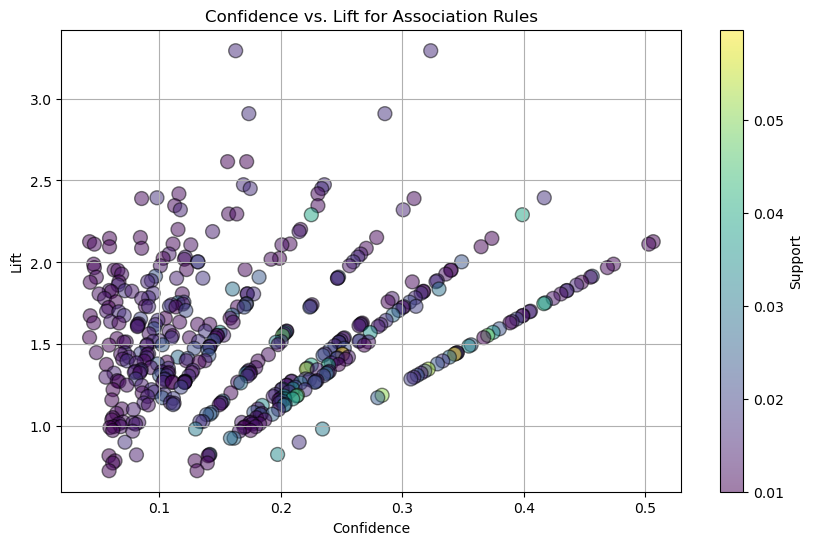

In [22]:
# Assuming 'rules' is your DataFrame containing association rules
# You can adjust the plot based on what you want to visualize
## Plotting confidence vs. lift
plt.figure(figsize=(10, 6))
plt.scatter(rules['confidence'], rules['lift'],alpha=0.5,c=rules['support'],cmap='viridis',s=100,edgecolors='k')
plt.colorbar(label='Support')
plt.xlabel('Confidence')
plt.ylabel('Lift')
plt.title('Confidence vs. Lift for Association Rules')
plt.grid(True)
plt.show();

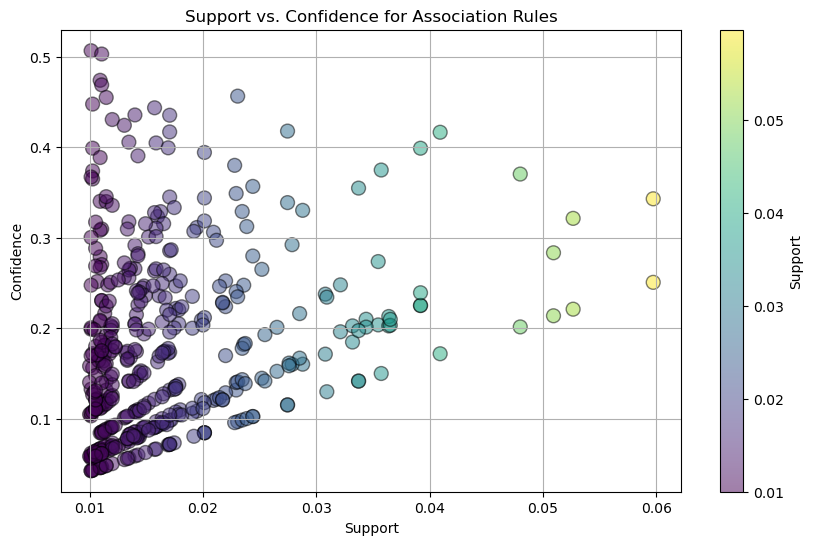

In [23]:
## Plotting support vs. confidence
plt.figure(figsize=(10, 6))
plt.scatter(rules['support'], rules['confidence'], alpha=0.5,c=rules['support'],cmap='viridis',s=100,edgecolors='k')
plt.colorbar(label='Support')
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.title('Support vs. Confidence for Association Rules')
plt.grid(True)
plt.show();

## Interview Questions:

### 1. What is lift and why is it important in Association rules?

** Lift measures how much more likely two items are to be bought together compared to being bought independently.
** Lift > 1 implies a positive association. It's crucial for identifying truly interesting associations.
** Lift---Range---(0-infinity)
** Lift(A,B) = Support(A & B) or No of time (A & B) occured / Support of A * Support of B

### 2. What is support and Confidence. How do you calculate them?

** Support: Frequency of itemset in all transactions.
** Support(A,B) = Number of times items purchased / Total No of Transactions
** Support---Range----(0-1)

** Confidence: Likelihood that B is bought when A is bought.
** Confidence(A,B) = Number of time(A & B)  or Support of (A & B) / Support of A
** Confidence---Range----(0-1)

### 3. What are some limitations or challenges of Association rules mining?

** Generates too many rules, making it hard to interpret.
** Ignores item profitability and quantity.
** Doesn’t capture sequential purchases.
** Computationally expensive on large datasets.